# <span style='color:blue'>Install Yellowbrick python package that extends Scikit-learn API with visual analysis and diagnostic tool</span>
# making change 

# Making change - test merge conflict

In [1]:
#!pip install yellowbrick ==> Ran into access issue so installed from ANACONCA Command Prompt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
house_data = pd.read_csv('datasets/house_data_processed.csv')

In [4]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [5]:
house_data.shape

(21613, 16)

In [6]:
target=house_data['price']
features=house_data.drop('price',axis=1)

In [7]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

In [8]:
from yellowbrick.target import FeatureCorrelation

# <span style='color:blue'>Correlation value ranges between -1 to +1 between two variables in a feature set</span>

In [9]:
feature_names=list(features.columns)

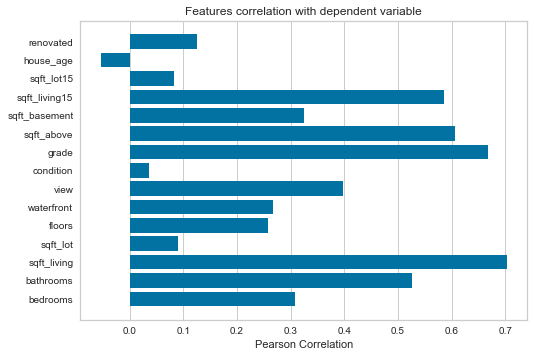

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [10]:
visualizer=FeatureCorrelation(labels=feature_names)
visualizer.fit(features,target)
visualizer.poof()

# <span style='color:blue'>Select top features by passing parameters after running REGRESSOR</span>

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

# Select one of the below , f_regression or mutual_info_regression to fit the regression model. mutual...calculates the dependency between independent and target variables, rest is the same flow of calculation

In [37]:
#select_univariate =SelectKBest(f_regression,k=5).fit(features,target)

In [39]:
select_univariatect=SelectKBest(mutual_info_regression,k=5).fit(features,target)

In [40]:
feature_mask=select_univariate.get_support()
feature_mask

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [41]:
selected_columns=features.columns[feature_mask]
selected_columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [42]:
selected_features=features[selected_columns]
selected_features.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [43]:
selected_features.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,290.000000,1.000000,290.000000,399.000000
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000


In [44]:
from sklearn.preprocessing import scale

In [45]:
X=pd.DataFrame(data=scale(selected_features),columns=selected_features.columns)
y=target

In [46]:
X.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.051951e-15,3.174253e-16,-2.328998e-15,3.892022e-16,-1.506632e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.745920e+00,-1.948891e+00,-5.663344e+00,-1.809494e+00,-2.316325e+00
25%,-4.736214e-01,-7.108948e-01,-5.588357e-01,-7.226314e-01,-7.244971e-01
50%,1.756067e-01,-1.849914e-01,-5.588357e-01,-2.758102e-01,-2.138280e-01
75%,5.002207e-01,5.118578e-01,2.919156e-01,5.091458e-01,5.448802e-01
max,7.641730e+00,1.247807e+01,4.545672e+00,9.204044e+00,6.162239e+00


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred= linear_regression.predict(X_test)

In [52]:
df=pd.DataFrame({'test':y_test,'Predicted':y_pred})
df.head()

,test,Predicted
13278,370000.0,316540.749442
432,1000000.0,681542.046409
20120,439990.0,560750.545730
7574,625000.0,751541.551802
5250,379000.0,656484.131611


In [53]:
from sklearn.metrics import r2_score

In [54]:
score = linear_regression.score(X_train,y_train)
print(score)

0.5480109443211387


In [55]:
linear_regression.score(X_test,y_test)

0.5287895868127995

In [56]:
r2score=r2_score(y_test,y_pred)
print(r2score)

0.5287895868127995


In [57]:
print('Score : {}'.format(score))
print('r2_score:{}'.format(r2score))

Score : 0.5480109443211387
r2_score:0.5287895868127995


In [58]:
linear_regression.coef_

array([-25307.07368763, 227720.95686442, 130586.55671187, -68376.42564397,
        12876.23980959])

In [59]:
linear_regression.intercept_

538827.5436437274

# <span style='color:blue'> Multiple Regression using ANALYTICAL Technique</span>

In [60]:
import statsmodels.api as sm

In [61]:
X_train=sm.add_constant(X_train)

In [62]:
X_train.head()

,const,bathrooms,sqft_living,grade,sqft_above,sqft_living15
7382,1.0,-0.473621,-0.010779,0.291916,0.340078,0.938825
4284,1.0,-1.447464,-1.066941,-0.558836,-0.831318,-0.315962
6426,1.0,0.500221,-0.511639,-0.558836,-0.215429,-0.549411
20076,1.0,0.500221,0.176499,0.291916,0.547790,-0.275108
9239,1.0,0.500221,1.459137,1.142667,1.970372,1.974753


In [63]:
model=sm.OLS(y_train,X_train).fit()
y_pred=model.predict(X_train)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     4191.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        06:54:04   Log-Likelihood:            -2.3920e+05
No. Observations:               17290   AIC:                         4.784e+05
Df Residuals:                   17284   BIC:                         4.785e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.388e+05   1875.966    287.227